In [1]:
#pip install datasets 
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset=load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df["job_skills"]=df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US=df[(df["job_title_short"]=="Data Analyst") & (df["job_country"] == "United States")].copy()
df_DA_US=df_DA_US.dropna(subset=["salary_year_avg"])


In [9]:
df_DA_US=df_DA_US.explode("job_skills")
df_DA_US[["salary_year_avg", "job_skills"]]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [13]:
df_DA_US_group=df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count" , "median"])
df_DA_top_pay=df_DA_US_group.sort_values(by="median", ascending=False).head(10)
df_DA_skills=df_DA_US_group.sort_values(by="count", ascending=False).head(10)
df_DA_skills


,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


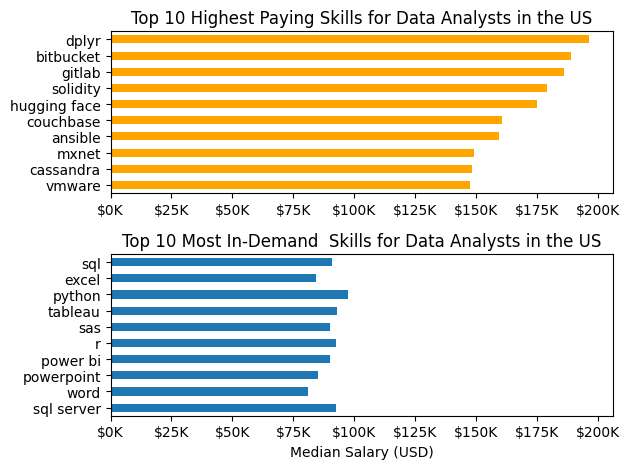

In [37]:
fig, ax =plt.subplots(2,1)
df_DA_top_pay.plot(kind="barh", y="median", ax=ax[0],legend=False, color="orange")#y eksenini ters çevirmek için [::-1] kullanıldı
ax[0].invert_yaxis()# y eksenini ters çevirmek için kullanıldı
ax[0].set_title("Top 10 Highest Paying Skills for Data Analysts in the US")
ax[0].set_xlabel("")     
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f"${int(x/1000)}K"))#x eksenindeki değerleri para birimi olarak göstermek için kullanıldı

df_DA_skills[::-1].plot(kind="barh", y="median", ax=ax[1],legend=False)#yukarıdan aşağıya doğru sıralamak için [::-1] kullanıldı
ax[1].set_xlim(ax[0].get_xlim())#her iki grafiğin x eksenini aynı yapmak için kullanıldı
ax[1].set_title("Top 10 Most In-Demand  Skills for Data Analysts in the US")
ax[1].set_xlabel("Median Salary (USD)")     
ax[1].set_ylabel("")
ax[1].set_xlim(ax[0].get_xlim())#her iki grafiğin x eksenini aynı yapmak için kullanıldı
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f"${int(x/1000)}K"))

fig.tight_layout()#grafiklerin düzenli görünmesi için kullanıldı